In [ ]:
import matplotlib as mpl 
import matplotlib.pyplot as plt   
import matplotlib.font_manager as fm   
from IPython.display import display
import seaborn as sns

import warnings
%matplotlib inline

sns.set(style='darkgrid')
warnings.filterwarnings('ignore')

In [ ]:
import pandas  as pd 
import numpy as np 

plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'

# 1. 프로젝트 소개
- 날씨에 따른 자전거 대여 횟수(수요) 예측
- 2011년 1월부터 2012년 12월까지 날짜, 시간, 기온, 습도, 풍속 등의 정보를 기반으로 1시간 간격 동안 자전거 대여 횟수

- 데이터 : https://www.kaggle.com/c/bike-sharing-demand

In [ ]:
# train
!gdown --id 1o9jAmz6Pvw9UBUgNNQZCF8G6V6oCLPSJ

# test
!gdown --id 1cU-eYLO6a7Ro_uZWUAW0_q2eqVsZJ6i-

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1o9jAmz6Pvw9UBUgNNQZCF8G6V6oCLPSJ
To: /content/bike_train.csv
100% 648k/648k [00:00<00:00, 126MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cU-eYLO6a7Ro_uZWUAW0_q2eqVsZJ6i-
To: /content/bike_test.csv
100% 324k/324k [00:00<00:00, 115MB/s]


In [ ]:
from IPython.display import display
train = pd.read_csv("bike_train.csv")
test = pd.read_csv("bike_test.csv")

In [ ]:
df = train.copy()
df_test = test.copy()

display(df.head())
df_test.head()
### NB: test data does not include y values.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.isnull().sum() 
### no missing data!

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<Axes: >

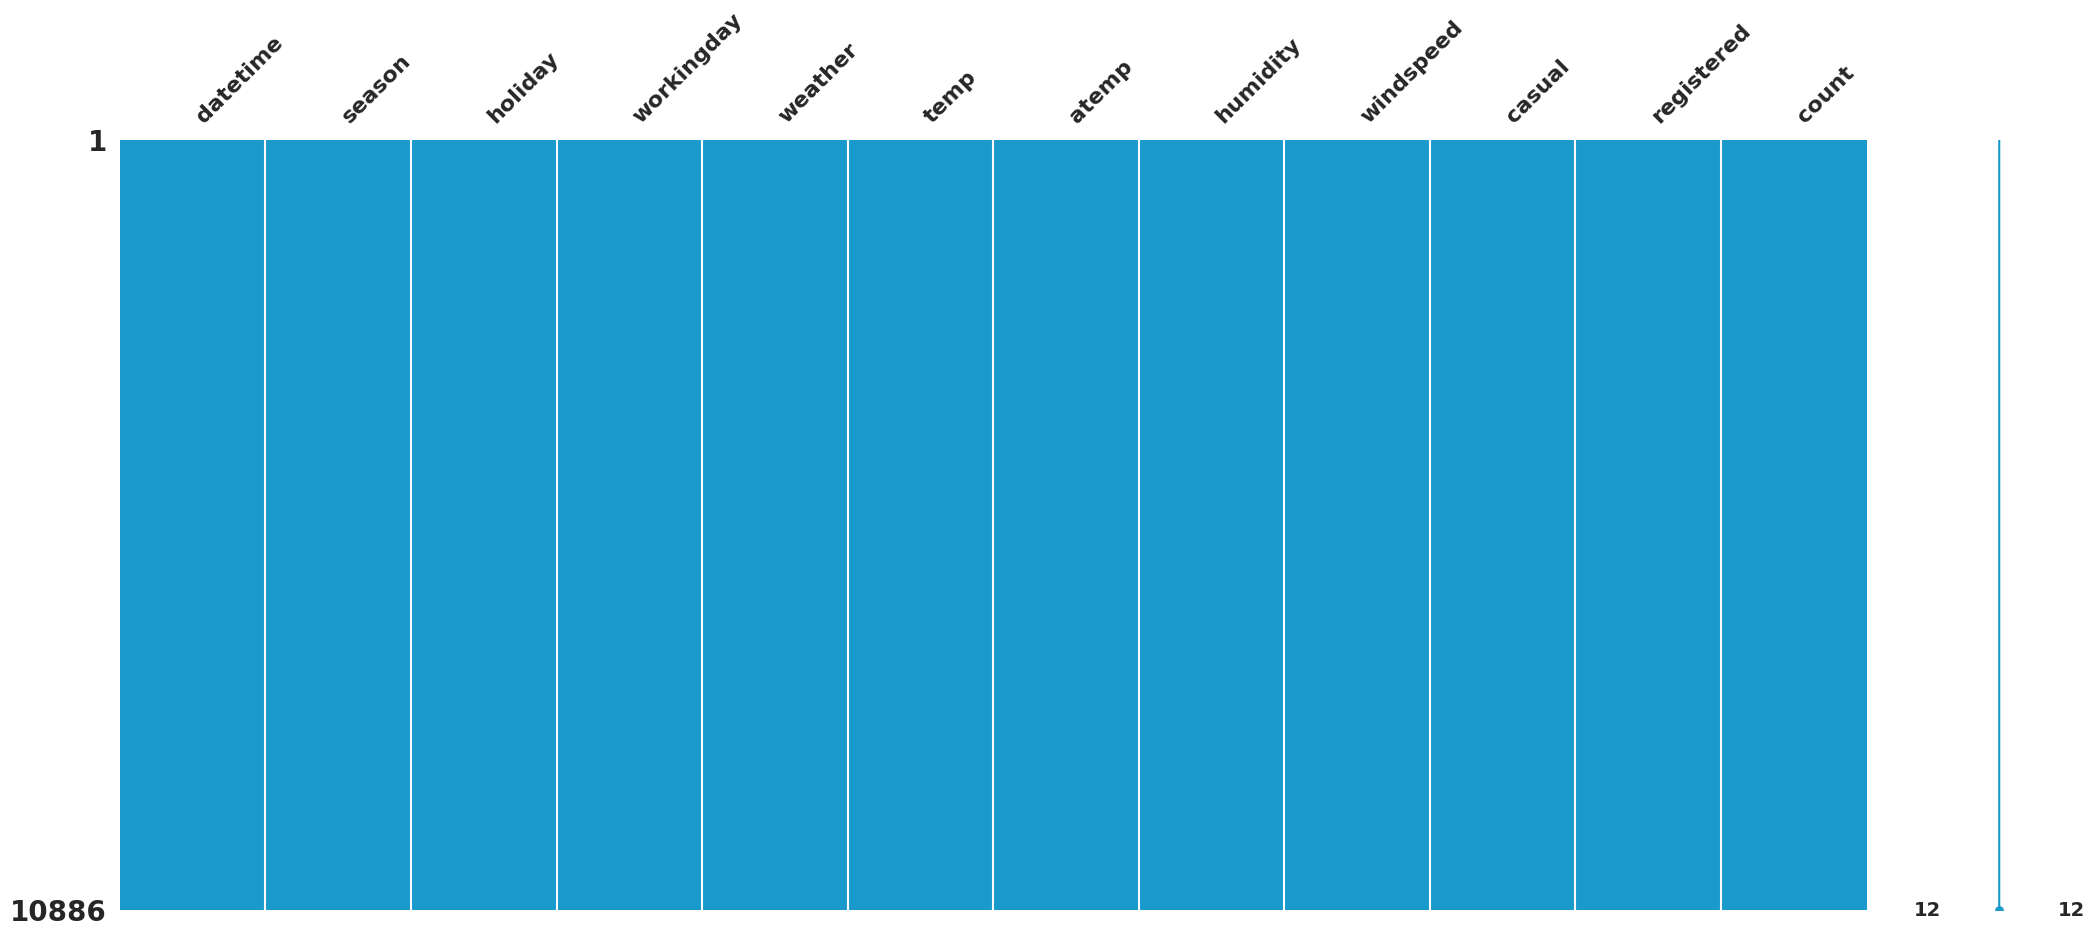

In [ ]:
import missingno as msno

msno.matrix(df,  color=(0.1, 0.6, 0.8))

<Axes: >

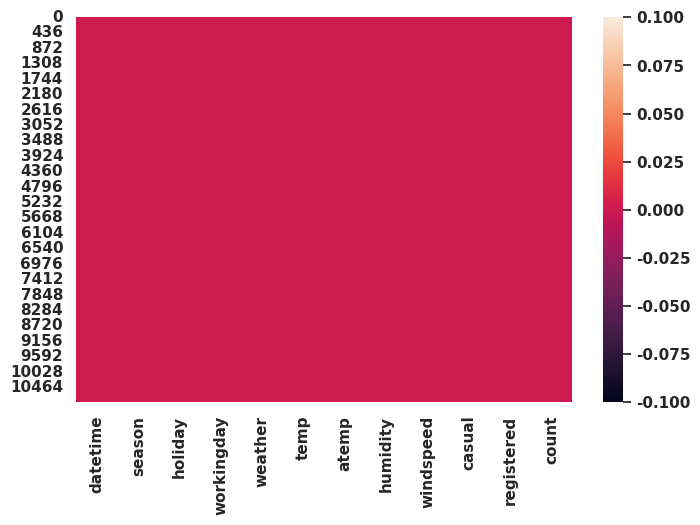

In [ ]:
sns.heatmap(df.isnull()) ### NB: Alternative method for detecting missing data!
                         ### strings need registering before checking missing data.  

# 2. Data Preprocessing

In [ ]:
from datetime import datetime, date, time, timedelta as dt
a = '2023/05/18' 
f = '%Y/%m/%d'
today = datetime.strptime(a, f) ### strptime not striptime.
### 100 days after today?
today + dt(days = 100)

b = '2023/5/30'
target = datetime.strptime(b, f) ### change datatype
target - today

datetime.timedelta(days=12)

In [ ]:
### parsing
today.year
today.day 
today.hour 


0

In [ ]:
# df['datetime'].dt.year ### NB: use "dt" module!
# df['datetime'].dt.month
# df['datetime'].dt.day
# df['datetime'].dt.hour
# df['datetime'].dt.minute
# df['datetime'].dt.second
# df['datetime'].dt.dayofweek

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime']) ### NB:datetime() makes data extracting easy and enables date-and-time calculations.  
display(df.info())
display(df['datetime'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


None

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [ ]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
df['datetime'].dt.year ### NB: use "dt" module.
df['datetime'].dt.month
df['datetime'].dt.day
df['datetime'].dt.hour
df['datetime'].dt.minute
df['datetime'].dt.second
df['datetime'].dt.dayofweek

0        5
1        5
2        5
3        5
4        5
        ..
10881    2
10882    2
10883    2
10884    2
10885    2
Name: datetime, Length: 10886, dtype: int64

# 3. Data Analysis

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
# Season
df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

<Axes: xlabel='season', ylabel='count'>

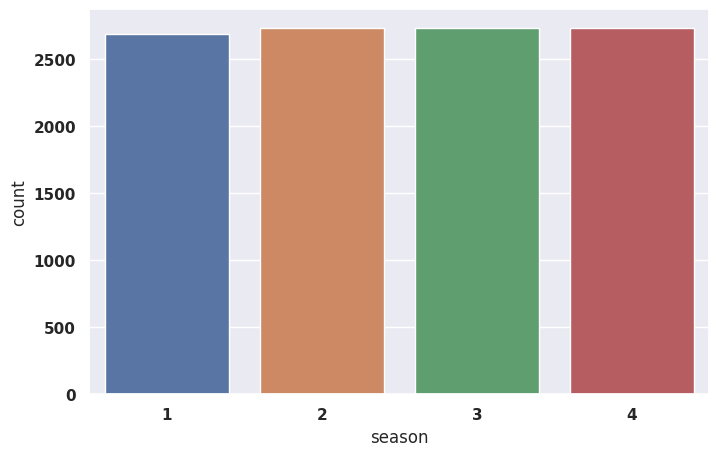

In [ ]:
#!pip install -U seaborn
import seaborn as sns
#print(sns.__version__)
#sns.catplot(x='season', data=df, kind='count', size=5, aspect=1.5)
#sns.catplot(x='season', data=df, kind='count') ### for a latest version of seaborn, use catplot! 
sns.countplot(x='season', data=df)

<Axes: xlabel='holiday', ylabel='count'>

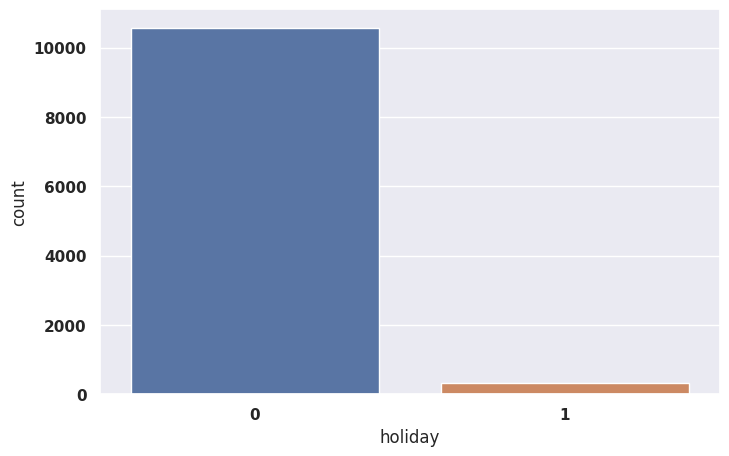

In [ ]:
# Holidays
import math
invGratio = 2/(1 + math.sqrt(5))
df.holiday.value_counts()
#sns.factorplot(x='holiday',data=df,kind='count',size=5);
sns.countplot(x='holiday', data=df)

대부분 휴일이 아님

<Axes: xlabel='workingday', ylabel='count'>

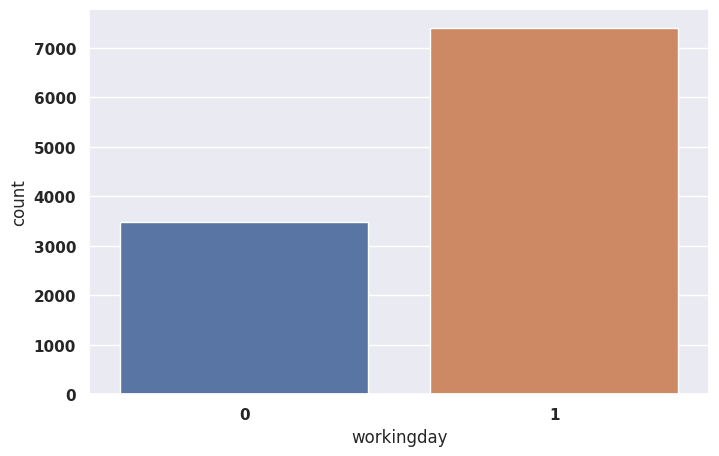

In [ ]:
# Working Days 
df.workingday.value_counts()
#sns.factorplot(x='workingday',data=df,kind='count',size=5);
sns.countplot(x='workingday',data=df)


1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

<Axes: xlabel='weather', ylabel='count'>

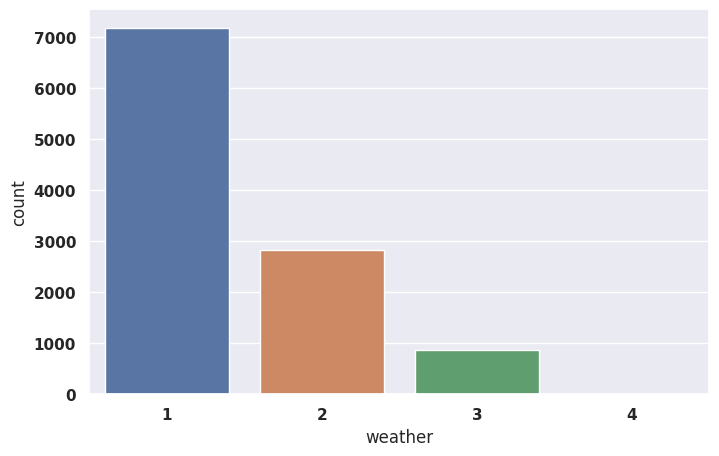

In [ ]:
#weather
display(df.weather.value_counts())
#sns.factorplot(x='weather',data=df,kind='count',size=5);
sns.countplot(x='weather', data=df)


수치형 변수들 살펴보기

In [ ]:
df.describe().round(1) ### atemp: sensible temperature

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.0,10886.0,10886.0,10886.0,10886.0,10886.0,10886.0
mean,2.5,0.0,0.7,1.4,20.2,23.7,61.9,12.8,36.0,155.6,191.6
std,1.1,0.2,0.5,0.6,7.8,8.5,19.2,8.2,50.0,151.0,181.1
min,1.0,0.0,0.0,1.0,0.8,0.8,0.0,0.0,0.0,0.0,1.0
25%,2.0,0.0,0.0,1.0,13.9,16.7,47.0,7.0,4.0,36.0,42.0
50%,3.0,0.0,1.0,1.0,20.5,24.2,62.0,13.0,17.0,118.0,145.0
75%,4.0,0.0,1.0,2.0,26.2,31.1,77.0,17.0,49.0,222.0,284.0
max,4.0,1.0,1.0,4.0,41.0,45.5,100.0,57.0,367.0,886.0,977.0


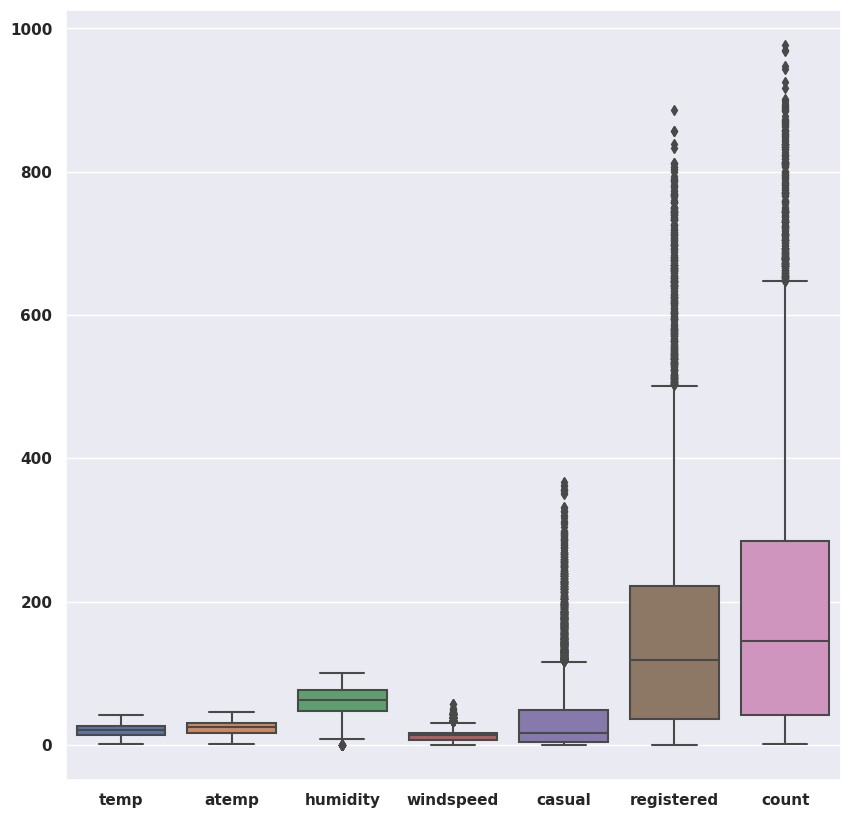

In [ ]:
# Visualization
sns.boxplot(data=df[['temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig=plt.gcf()
fig.set_size_inches(10,10)

<Axes: >

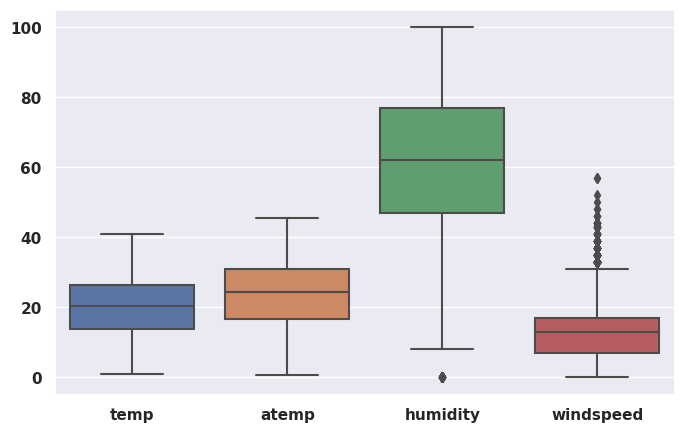

In [ ]:
sns.boxplot(data=df[['temp','atemp', 'humidity', 'windspeed']]) ### NB: drop out some columns to change scales.


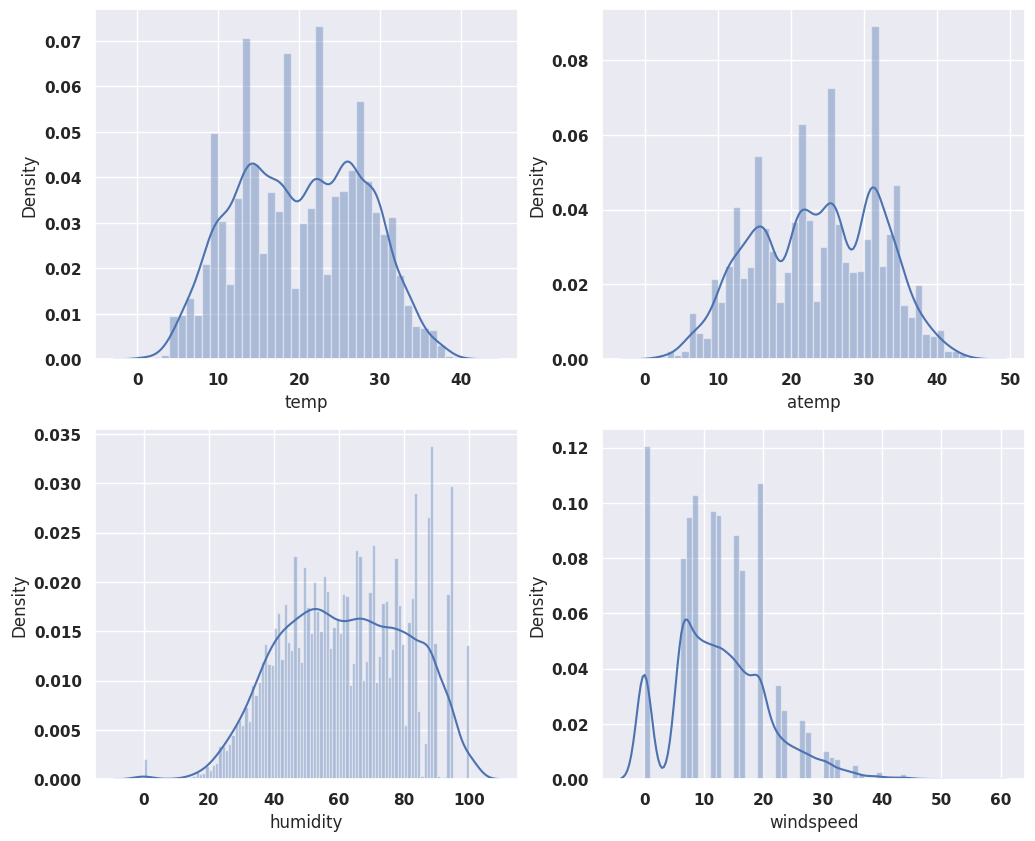

In [ ]:
#온도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.distplot(df.temp, bins=range(int(df.temp.min()), int(df.temp.max())+1))

#평균온도와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.distplot(df.atemp,bins=range(int(df.atemp.min()),int(df.atemp.max())+1))

#습도와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.distplot(df.humidity,bins=range(int(df.humidity.min()), int(df.humidity.max())+1))

#바람속도와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.distplot(df.windspeed,bins=range(int(df.windspeed.min()),int(df.windspeed.max())+1))

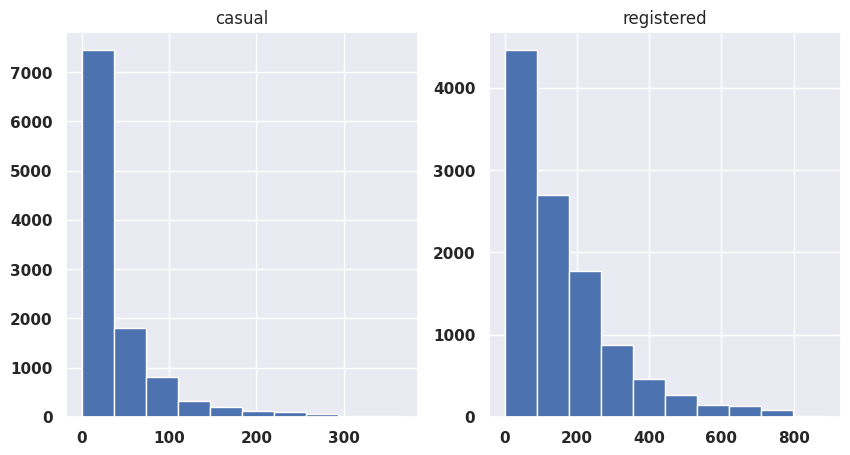

In [ ]:
fig, axes = plt.subplots(1,2)
axes[0].hist(x='casual', data=df)
axes[0].set_title("casual")

axes[1].hist(x='registered', data=df)
axes[1].set_title("registered")

fig.set_size_inches(10,5)
plt.show()

In [ ]:
# 상관관계 살펴보기
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


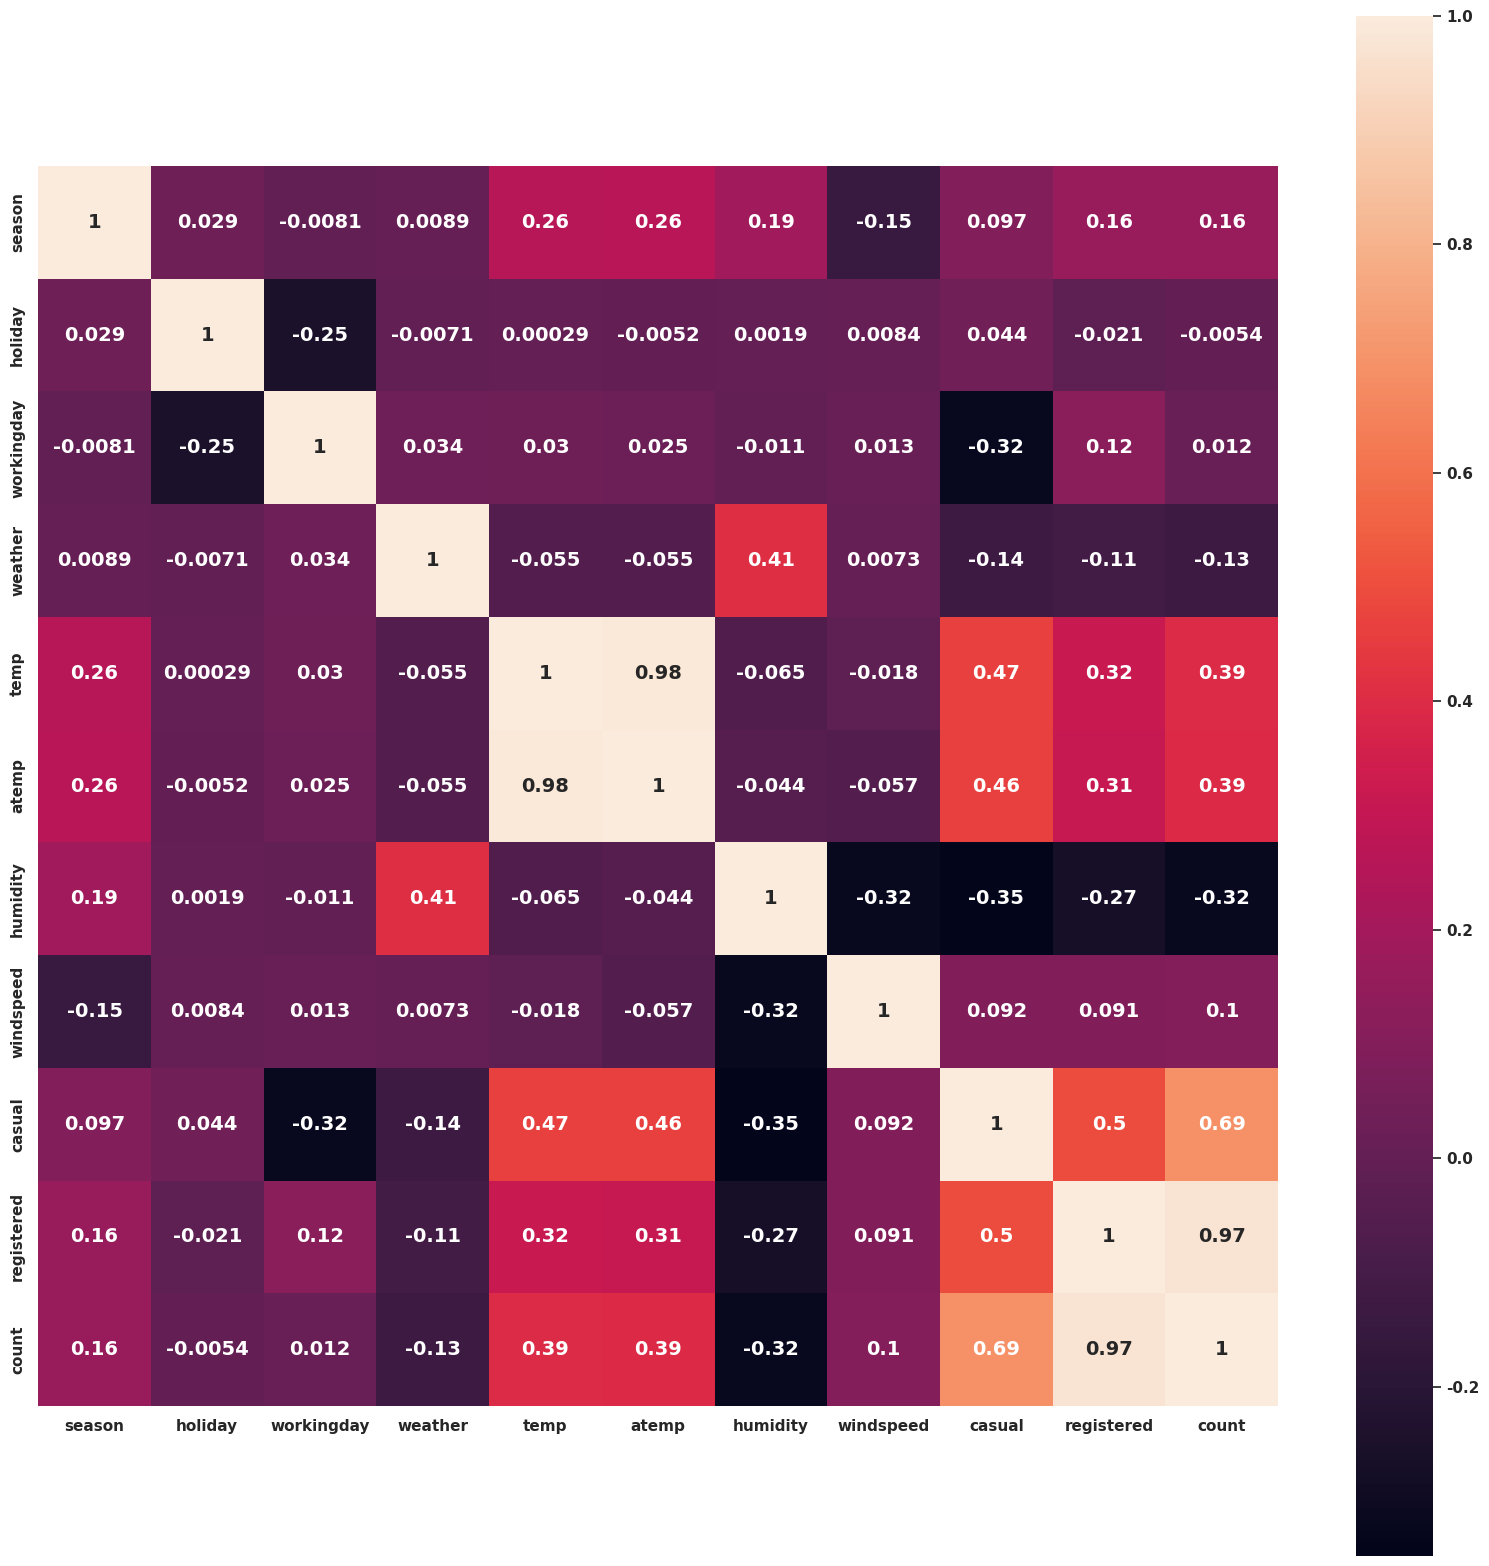

In [ ]:
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.corr(), annot=True, square=True) ### NB: if x & y correlation is high (>0.3: moderate; >0.6: strong) ===> drop them out.

# 4. Feature Engineering

In [ ]:
datetime = df["datetime"] 

df["year"] = datetime.dt.year
df["month"] = datetime.dt.month
df["day"] = datetime.dt.day
df["hour"] = datetime.dt.hour
df["minute"] = datetime.dt.minute
df["second"] = datetime.dt.second

In [ ]:
df.describe()[['year','month', 'day', 'hour', 'minute', 'second']] ### NB: useful !!!

,year,month,day,hour,minute,second
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0
mean,2011.501929,6.521495,9.992559,11.541613,0.0,0.0
std,0.500019,3.444373,5.476608,6.915838,0.0,0.0
min,2011.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,2011.000000,4.000000,5.000000,6.000000,0.0,0.0
50%,2012.000000,7.000000,10.000000,12.000000,0.0,0.0
75%,2012.000000,10.000000,15.000000,18.000000,0.0,0.0
max,2012.000000,12.000000,19.000000,23.000000,0.0,0.0


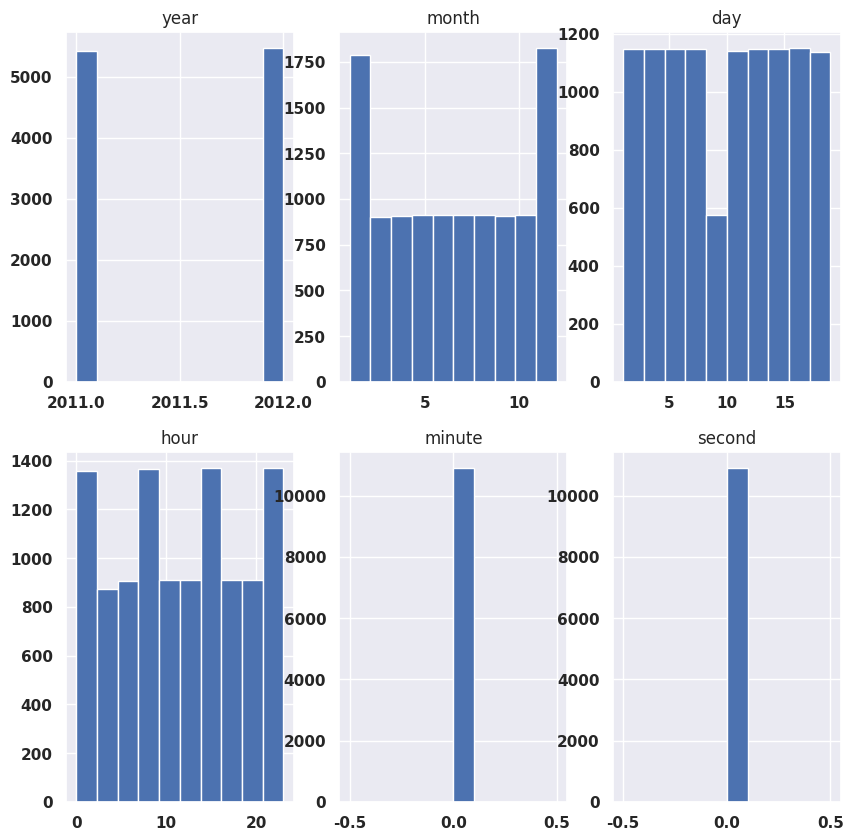

In [ ]:
# 히스토그램으로 분포 살펴보기

fig, axes = plt.subplots(2,3)
axes[0,0].hist(x='year', data=df)
axes[0,0].set_title("year")

axes[0,1].hist(x='month', data=df)
axes[0,1].set_title("month")

axes[0,2].hist(x='day', data=df)
axes[0,2].set_title("day")

axes[1,0].hist(x='hour', data=df)
axes[1,0].set_title("hour")

axes[1,1].hist(x='minute', data=df)
axes[1,1].set_title("minute")

axes[1,2].hist(x='second', data=df)
axes[1,2].set_title("second")

fig.set_size_inches(10,10)
plt.show()

In [ ]:
datetime = df["datetime"] 

df['dayofweek'] = datetime.dt.dayofweek
df.dayofweek.head()

0    5
1    5
2    5
3    5
4    5
Name: dayofweek, dtype: int64

<Axes: >

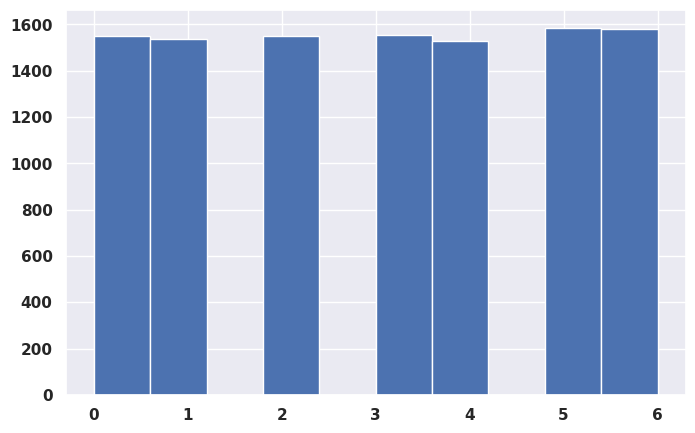

In [ ]:
df['dayofweek'].hist()

In [ ]:
df.drop(['datetime','day','minute', 'second'],inplace=True,axis=1)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,5


In [ ]:
df.columns, len(df.columns)

(Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
        'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
        'month', 'hour', 'dayofweek'],
       dtype='object'),
 15)

In [ ]:
df_test.columns, len(df_test.columns)

(Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
        'atemp', 'humidity', 'windspeed'],
       dtype='object'),
 9)

train과 test데이터를 비교해보니 회원정보와 관련된 casual과 register은 테스트 데이터에 포함되어 있지 않습니다. 
-> train에도 제거해주겠습니다. 

In [ ]:
df.drop(['casual','registered'],axis=1,inplace=True)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,22,2


##  Count와 변수들의 관계 살펴보기

가장 먼저 "Time"과 종속변수인 count의 관계 살펴보기 

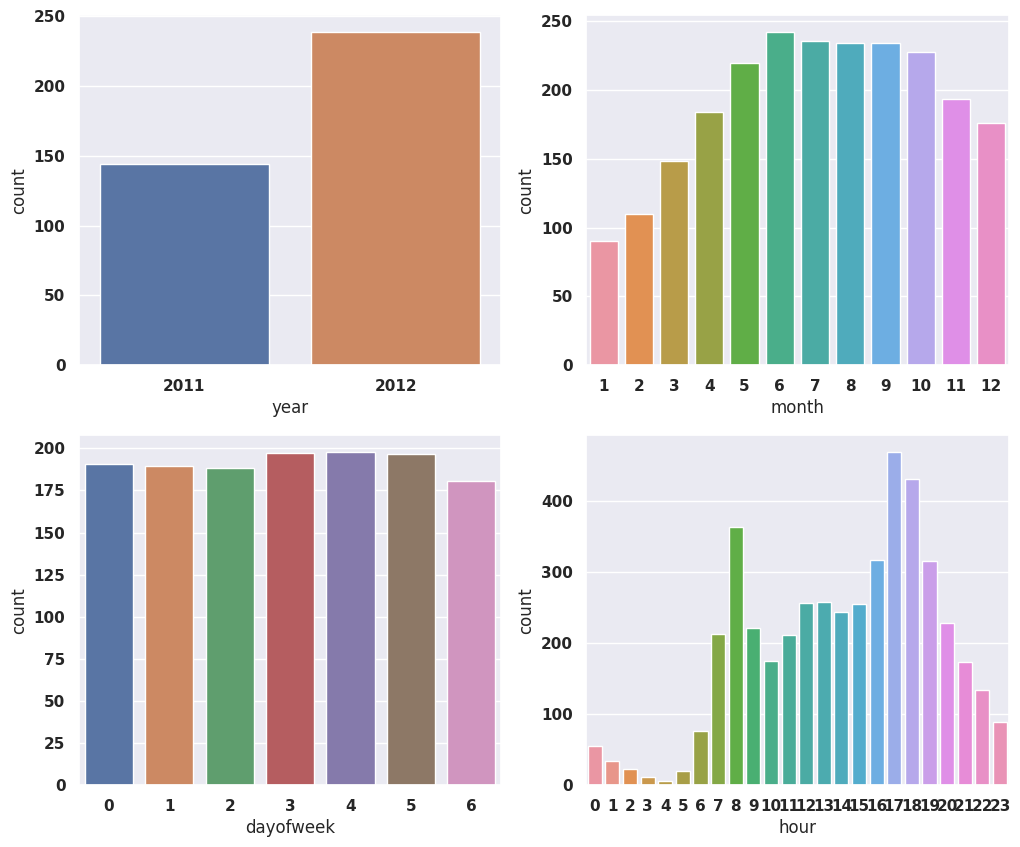

In [ ]:
#년도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='year',y='count',data=df.groupby('year')['count'].mean().reset_index()) ### NB: reset_index()

#month와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month',y='count',data=df.groupby('month')['count'].mean().reset_index())

#dayofweek와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='dayofweek',y='count',data=df.groupby('dayofweek')['count'].mean().reset_index())

#hour와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour',y='count',data=df.groupby('hour')['count'].mean().reset_index())

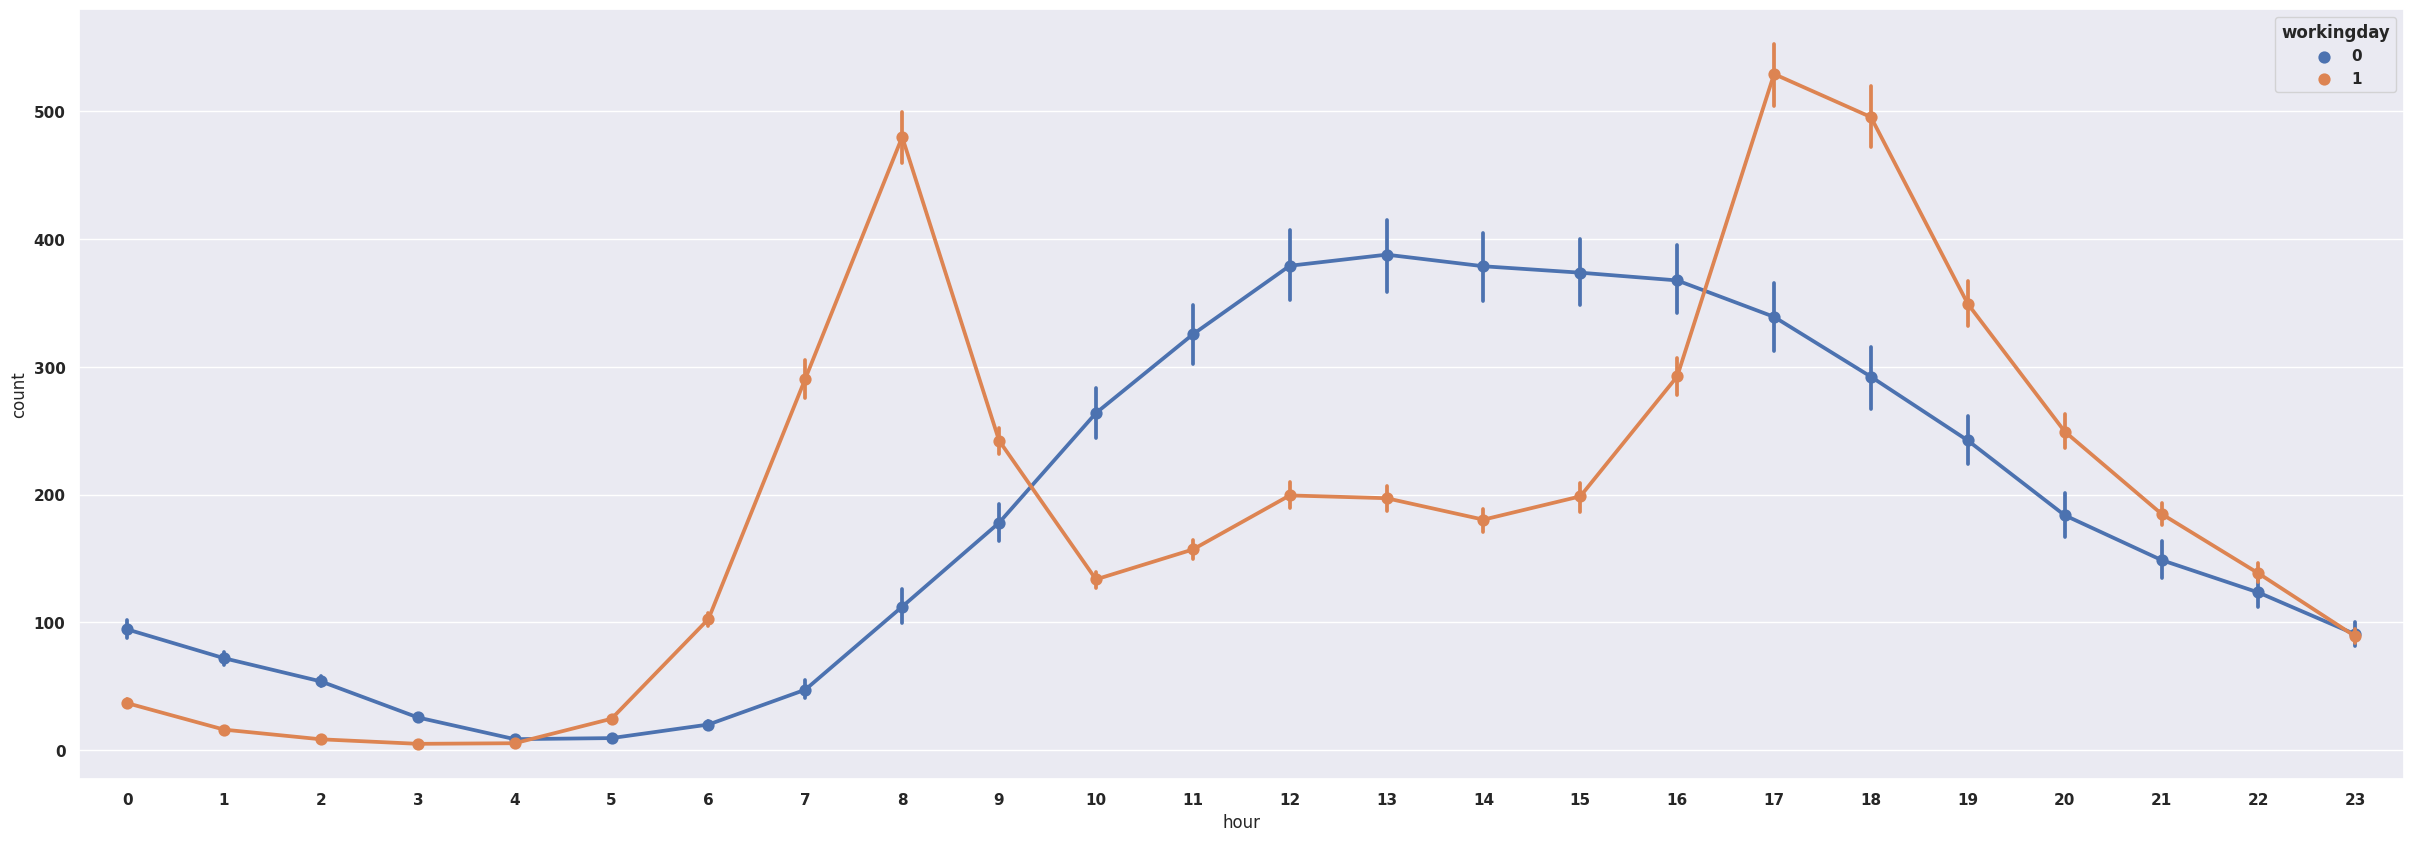

In [ ]:
plt.figure(figsize=(30,10))
sns.pointplot(data=df, x='hour', y='count', hue='workingday');

- 주중과 주말 자전거 대여 시간 분포가 다름

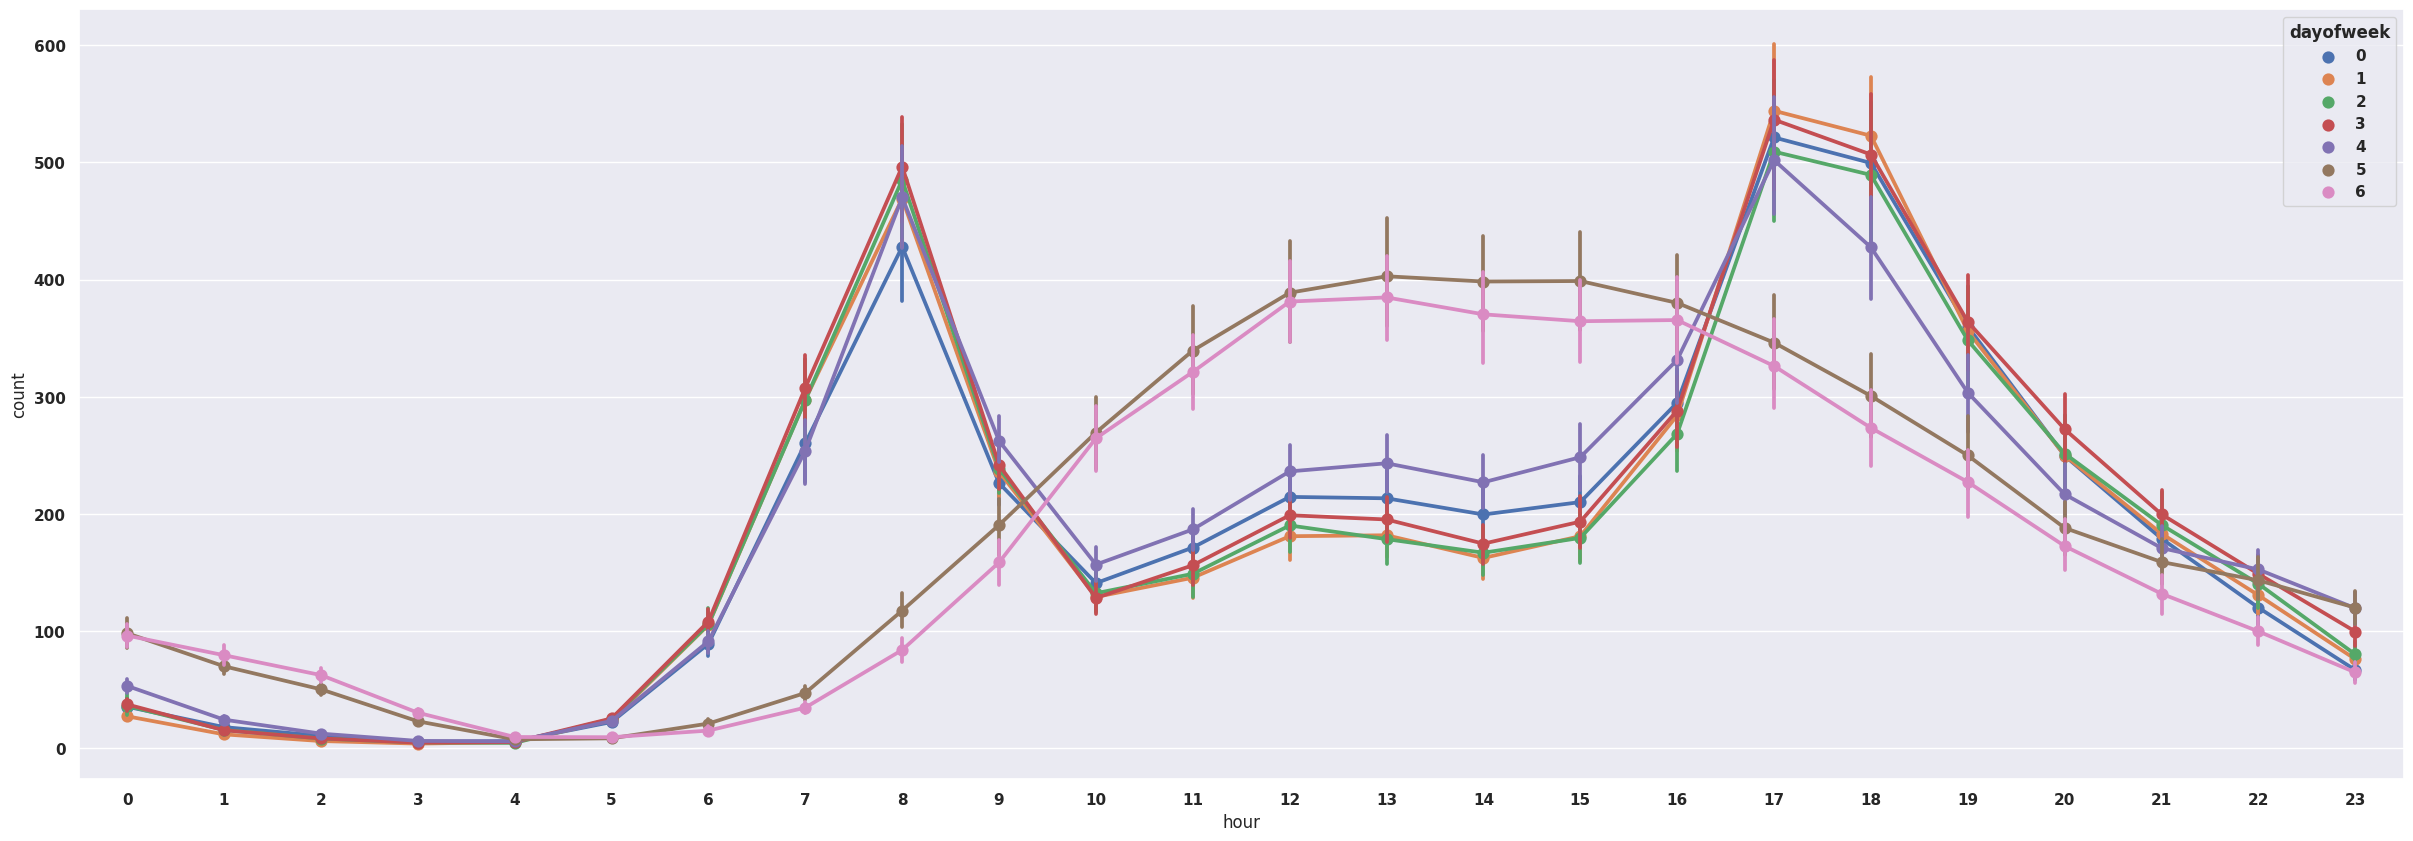

In [ ]:
plt.figure(figsize=(30,10))
sns.pointplot(data=df, x='hour', y='count', hue='dayofweek');

- 요일별로도 분포가 다름

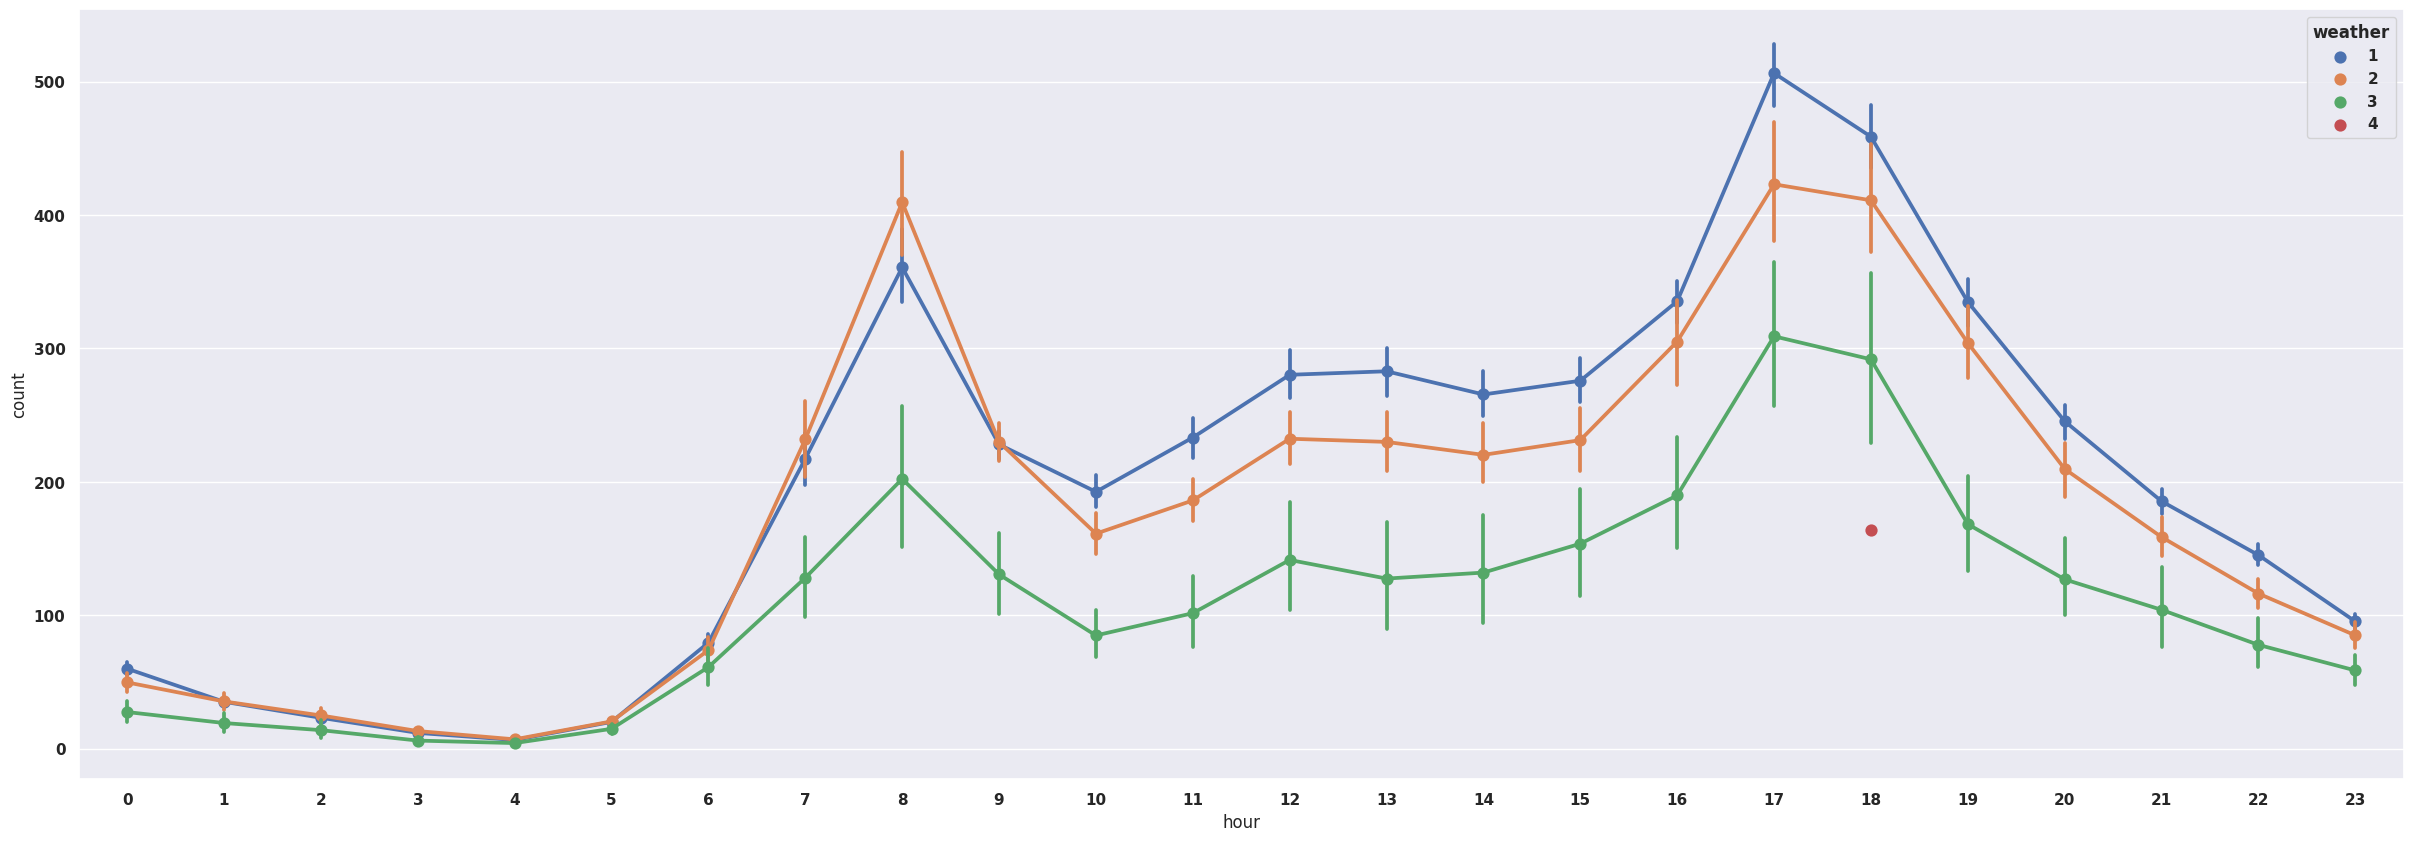

In [ ]:
plt.figure(figsize=(30,10))
sns.pointplot(data=df, x='hour', y='count', hue='weather');

In [ ]:
season=pd.get_dummies(df['season'],prefix='season') ### NB: 
df=pd.concat([df,season],axis=1)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,hour,dayofweek,season_1,season_2,season_3,season_4
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,0,5,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,5,1,0,0,0
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,2,5,1,0,0,0
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,3,5,1,0,0,0
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,4,5,1,0,0,0


In [ ]:
weather=pd.get_dummies(df['weather'],prefix='weather')
df=pd.concat([df,weather],axis=1)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,...,hour,dayofweek,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,...,0,5,1,0,0,0,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,...,1,5,1,0,0,0,1,0,0,0
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,...,2,5,1,0,0,0,1,0,0,0
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,...,3,5,1,0,0,0,1,0,0,0
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,...,4,5,1,0,0,0,1,0,0,0


In [ ]:
dayofweek=pd.get_dummies(df['dayofweek'],prefix='dayofweek')
df=pd.concat([df,dayofweek],axis=1)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,...,weather_2,weather_3,weather_4,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.drop(['season','weather', 'dayofweek'],inplace=True,axis=1)
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,month,hour,...,weather_2,weather_3,weather_4,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,0,0,9.84,14.395,81,0.0,16,2011,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,9.02,13.635,80,0.0,40,2011,1,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,9.02,13.635,80,0.0,32,2011,1,2,...,0,0,0,0,0,0,0,0,1,0
3,0,0,9.84,14.395,75,0.0,13,2011,1,3,...,0,0,0,0,0,0,0,0,1,0
4,0,0,9.84,14.395,75,0.0,1,2011,1,4,...,0,0,0,0,0,0,0,0,1,0


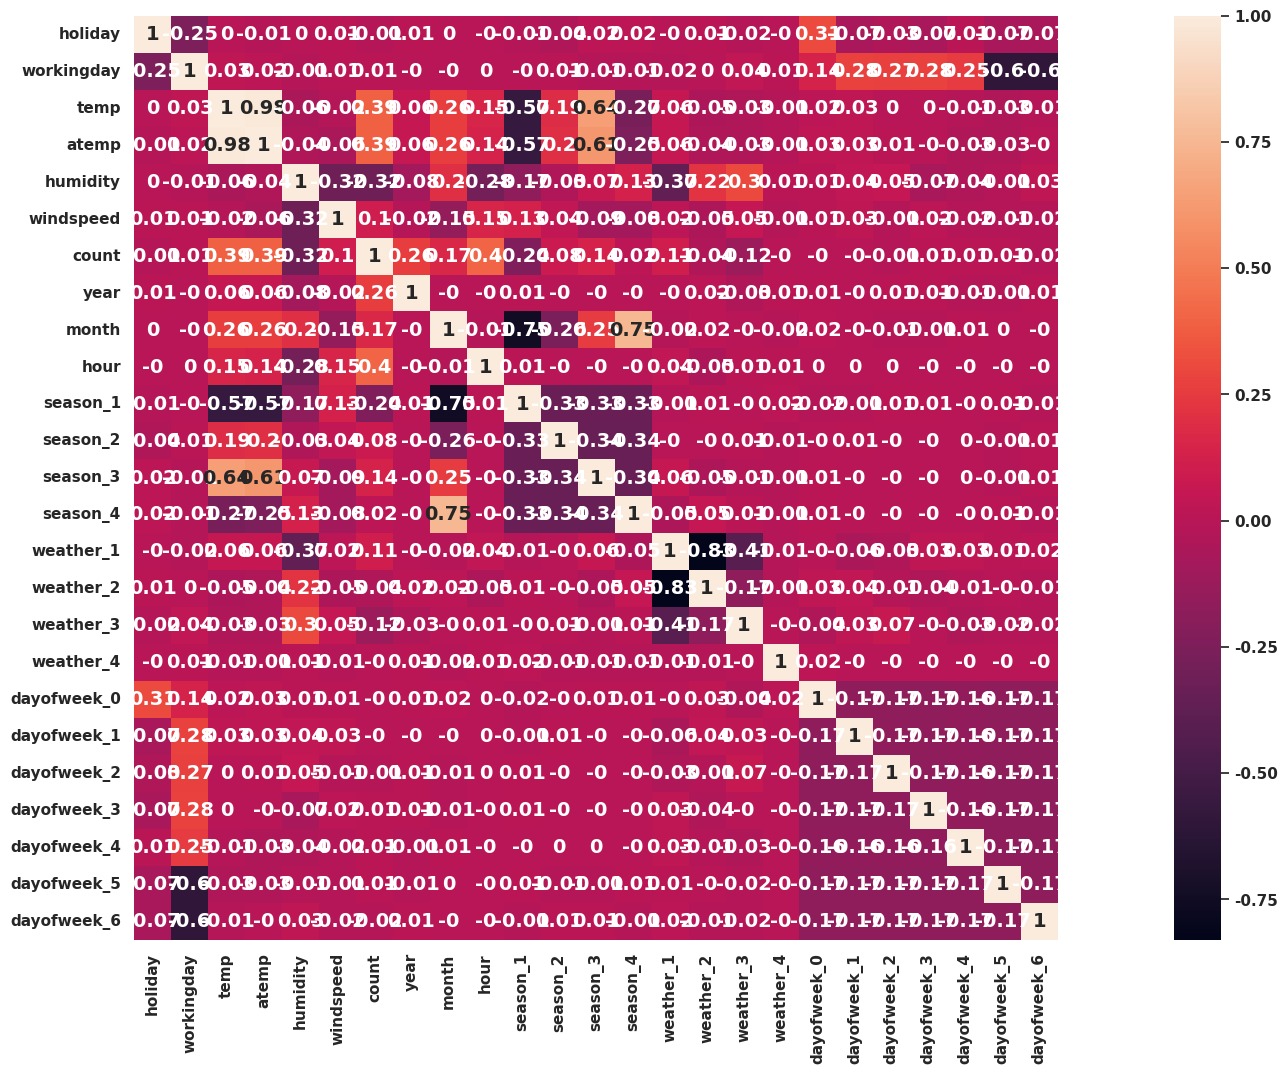

In [ ]:
# 다시 corr확인
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=df.corr().round(2),square=True,annot=True,cbar=True);

# Modeling

## Data Preparation

In [ ]:
X = train.copy()
y = train['count']

X.shape, y.shape

((10886, 12), (10886,))

In [ ]:
X.pop('count')

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 935.6+ KB


In [ ]:
datetime = pd.to_datetime(X['datetime'])

X["year"] = datetime.dt.year
X["month"] = datetime.dt.month
X["hour"] = datetime.dt.hour
X['dayofweek'] = datetime.dt.dayofweek

season=pd.get_dummies(X['season'],prefix='season')
X=pd.concat([X,season],axis=1)

weather=pd.get_dummies(X['weather'],prefix='weather')
X=pd.concat([X,weather],axis=1)

dayofweek=pd.get_dummies(X['dayofweek'],prefix='dayofweek')
X=pd.concat([X,dayofweek],axis=1)

In [ ]:
X.drop(['datetime', 'casual','registered','season','weather', 'dayofweek'],inplace=True,axis=1)
X.head()

,holiday,workingday,temp,atemp,humidity,windspeed,year,month,hour,season_1,...,weather_2,weather_3,weather_4,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,0,0,9.84,14.395,81,0.0,2011,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,9.02,13.635,80,0.0,2011,1,1,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,9.02,13.635,80,0.0,2011,1,2,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,9.84,14.395,75,0.0,2011,1,3,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,9.84,14.395,75,0.0,2011,1,4,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   holiday      10886 non-null  int64  
 1   workingday   10886 non-null  int64  
 2   temp         10886 non-null  float64
 3   atemp        10886 non-null  float64
 4   humidity     10886 non-null  int64  
 5   windspeed    10886 non-null  float64
 6   year         10886 non-null  int64  
 7   month        10886 non-null  int64  
 8   hour         10886 non-null  int64  
 9   season_1     10886 non-null  uint8  
 10  season_2     10886 non-null  uint8  
 11  season_3     10886 non-null  uint8  
 12  season_4     10886 non-null  uint8  
 13  weather_1    10886 non-null  uint8  
 14  weather_2    10886 non-null  uint8  
 15  weather_3    10886 non-null  uint8  
 16  weather_4    10886 non-null  uint8  
 17  dayofweek_0  10886 non-null  uint8  
 18  dayofweek_1  10886 non-null  uint8  
 19  dayo

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8708, 24), (2178, 24), (8708,), (2178,))

Data Training

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train, y_train)
lin_reg

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_train)
y_pred

array([336.72756309, 374.38299616, 186.44498992, ..., 264.21413091,
       266.79278118, 236.47286835])

In [ ]:
lin_reg.coef_

array([-3.91383850e+00,  6.04225223e-01,  4.16688225e+00,  3.53837157e+00,
       -1.93722171e+00,  6.34098427e-01,  8.08202389e+01,  8.70416476e+00,
        7.75509931e+00,  1.16487415e+01,  1.25024022e+01, -3.29199870e+01,
        8.76884333e+00,  7.39307533e+00,  1.43612107e+01, -2.17542861e+01,
        3.55271368e-15, -9.42066694e+00, -1.70551735e+00,  2.21111046e+00,
       -2.46596541e+00,  8.07142598e+00,  1.08805823e+01, -7.57096904e+00])

In [ ]:
lin_reg.intercept_

-162587.65921251592

In [ ]:
lin_reg.score(X_train, y_train)

0.4003197681876306

In [ ]:
lin_reg.score(X_test, y_test)

0.3879530761989515

$$ RMSE(\hatθ) = \sqrt{MSE(\hatθ)} = \sqrt{E((\hatθ - θ)^2})  = \sqrt{\frac{1}{n}\sum_{i=1}^n(\hatθ-θ)^2}$$

In [ ]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_pred)

train_mse = np.sqrt(train_mse)
train_mse

140.11822776851224

In [ ]:
test_mse = np.sqrt(mean_squared_error(y_test, lin_reg.predict(X_test)))
test_mse

142.3092466025887

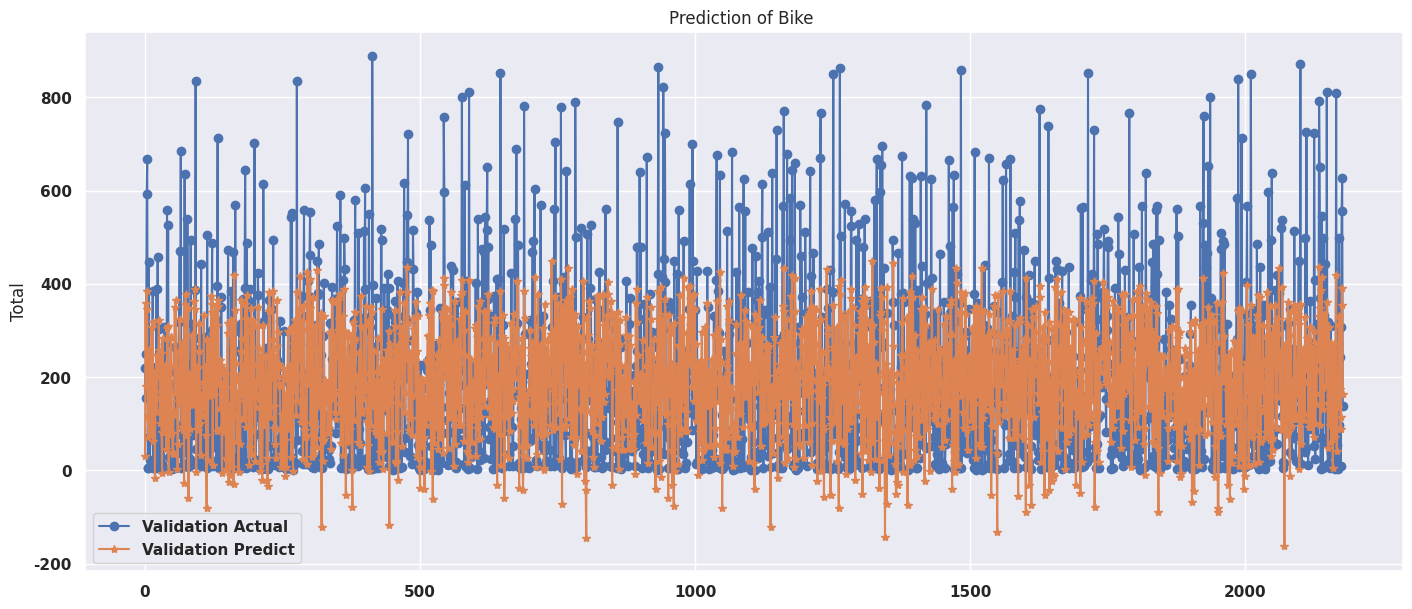

In [ ]:
# Test 데이터: 예측과 실제값 비교 
pred_val = lin_reg.predict(X_test)

plt.figure(figsize=(17,7))
plt.plot(range(0, len(y_test)), y_test,'o-', label='Validation Actual')
plt.plot(range(0, len(pred_val)), pred_val, '*-', label='Validation Predict')
plt.title('Prediction of Bike ')
plt.ylabel('Total')
plt.legend()

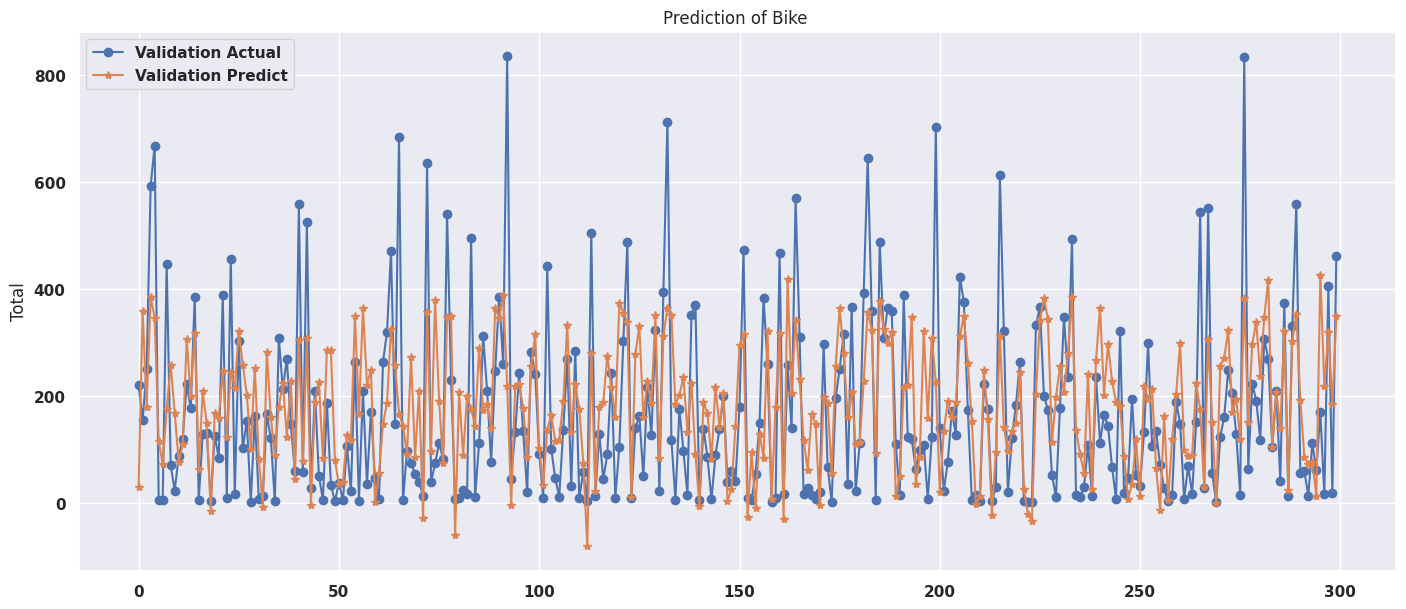

In [ ]:
num = 300

pred_val = lin_reg.predict(X_test.iloc[:num])

plt.figure(figsize=(17,7))
plt.plot(range(0, len(pred_val)), y_test.iloc[:num],'o-', label='Validation Actual')
plt.plot(range(0, len(pred_val)), pred_val, '*-', label='Validation Predict')
plt.title('Prediction of Bike ')
plt.ylabel('Total')
plt.legend()